In [1]:
#cleaning data and importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as m
import scipy as sp
from pandas.plotting import scatter_matrix
import seaborn as sns

urls = ['https://s3.amazonaws.com/baywheels-data/2017-fordgobike-tripdata.csv', 'https://s3.amazonaws.com/baywheels-data/201801-fordgobike-tripdata.csv.zip','https://s3.amazonaws.com/baywheels-data/201802-fordgobike-tripdata.csv.zip', 'https://s3.amazonaws.com/baywheels-data/201803-fordgobike-tripdata.csv.zip','https://s3.amazonaws.com/baywheels-data/201804-fordgobike-tripdata.csv.zip','https://s3.amazonaws.com/baywheels-data/201805-fordgobike-tripdata.csv.zip','https://s3.amazonaws.com/baywheels-data/201806-fordgobike-tripdata.csv.zip','https://s3.amazonaws.com/baywheels-data/201807-fordgobike-tripdata.csv.zip', 'https://s3.amazonaws.com/baywheels-data/201808-fordgobike-tripdata.csv.zip','https://s3.amazonaws.com/baywheels-data/201809-fordgobike-tripdata.csv.zip','https://s3.amazonaws.com/baywheels-data/201810-fordgobike-tripdata.csv.zip','https://s3.amazonaws.com/baywheels-data/201811-fordgobike-tripdata.csv.zip','https://s3.amazonaws.com/baywheels-data/201812-fordgobike-tripdata.csv.zip','https://s3.amazonaws.com/baywheels-data/201901-fordgobike-tripdata.csv.zip','https://s3.amazonaws.com/baywheels-data/201902-fordgobike-tripdata.csv.zip','https://s3.amazonaws.com/baywheels-data/201903-fordgobike-tripdata.csv.zip','https://s3.amazonaws.com/baywheels-data/201904-fordgobike-tripdata.csv.zip','https://s3.amazonaws.com/baywheels-data/201905-baywheels-tripdata.csv.zip']
dfs = [pd.read_csv(url) for url in urls]

final_data = pd.concat(dfs, ignore_index=True, sort = False)
# print(final_data.head())
# final_data.isnull().sum(axis = 0)

final_data['start_station_name'] = final_data['start_station_name'].str.strip()
final_data['end_station_name'] = final_data['end_station_name'].str.strip()
final_data['member_gender'] = final_data['member_gender'].str.strip()
if final_data['member_gender'].str == 'M':
    final_data['member_gender'] = final_data['member_gender'].replace('M', 'Male')
if final_data['member_gender'].str == 'F':
    final_data['member_gender'] = final_data['member_gender'].replace('F', 'Female')
final_data_clean = final_data.dropna(axis = 0, how = 'any', subset = ['start_station_id', 'start_station_name', 'end_station_id', 'end_station_name', 'member_birth_year', 'member_gender'])
final_data_clean.isnull().sum(axis = 0)

duration_sec                    0
start_time                      0
end_time                        0
start_station_id                0
start_station_name              0
start_station_latitude          0
start_station_longitude         0
end_station_id                  0
end_station_name                0
end_station_latitude            0
end_station_longitude           0
bike_id                         0
user_type                       0
member_birth_year               0
member_gender                   0
bike_share_for_all_trip    453159
dtype: int64

In [10]:
#making master dataframe
#SettingWithCopyWarning gives false positive on the first run since pandas is unsure whether a view or copy was returned.
#The second run of code does not generate SettingWithCopyWarning. This shows that a copy was generated the first time and the chained assignments issue is taken care of.
#Run this block of code twice to get rid of SettingWithCopyWarning
final_data_clean.loc[:,'route'] = final_data_clean['start_station_name'].copy() + ' - ' + final_data_clean['end_station_name'].copy()

final_data_clean.loc[:,'member_age'] = pd.to_datetime(final_data_clean['end_time']).copy().apply(lambda x: x.year)
final_data_clean.loc[:,'member_age'] = final_data_clean['member_age'].copy().astype(int) - final_data_clean['member_birth_year'].copy().astype(int)

final_data_clean.loc[:,'weekday'] = pd.to_datetime(final_data_clean['start_time']).copy().apply(lambda x: x.day_name())
final_data_clean.loc[:,'day_type'] = (pd.to_datetime(final_data_clean['start_time']).copy().apply(lambda x: x.weekday())//5 ==1).astype(str)
final_data_clean.loc[:,'day_type'] = final_data_clean['day_type'].copy().replace('True', 'Weekend')
final_data_clean.loc[:,'day_type'] = final_data_clean['day_type'].copy().replace('False', 'Weekday')
print(final_data_clean.head())

    duration_sec                start_time                  end_time  \
0          80110  2017-12-31 16:57:39.6540  2018-01-01 15:12:50.2450   
1          78800  2017-12-31 15:56:34.8420  2018-01-01 13:49:55.6170   
4          43603  2017-12-31 14:23:14.0010  2018-01-01 02:29:57.5710   
6           4507  2017-12-31 23:49:28.4220  2018-01-01 01:04:35.6190   
12          2183  2017-12-31 23:52:55.5810  2018-01-01 00:29:18.7430   

    start_station_id                                 start_station_name  \
0               74.0                              Laguna St at Hayes St   
1              284.0  Yerba Buena Center for the Arts (Howard St at ...   
4              239.0                      Bancroft Way at Telegraph Ave   
6              259.0                            Addison St at Fourth St   
12              67.0  San Francisco Caltrain Station 2  (Townsend St...   

    start_station_latitude  start_station_longitude  end_station_id  \
0                37.776435              -122.

<Figure size 720000x3.6e+06 with 0 Axes>

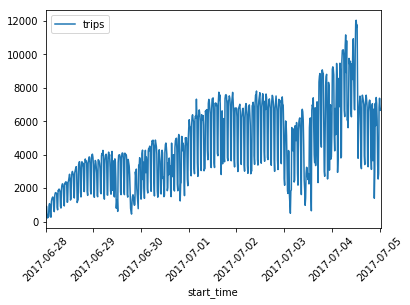

In [3]:
# time-series plot for number of trips

df1 = final_data_clean.loc[:,['start_time', 'bike_id']]
df1['start_time'] = pd.to_datetime(df1['start_time']).apply(lambda x: x.strftime('%Y-%m-%d'))
df2 = df1.groupby(["start_time"]).agg({'bike_id':'count'}).reset_index()
df2 = df2.rename({"bike_id" : "trips"}, axis = 1)
#print(df2.head())

%matplotlib inline
plt.figure(figsize = (10000,50000))
df2.plot(x= 'start_time').set_xticklabels(df2.start_time, rotation=45)
plt.show()

In [4]:
#slicing data

df_f1 = final_data_clean.loc[:,['start_time', 'duration_sec', 'start_station_name','end_station_name','bike_id', 'user_type', 'member_birth_year', 'member_gender','member_age','weekday', 'day_type']]
df_f1['start_time'] = pd.to_datetime(df_f1['start_time']).apply(lambda x: x.strftime('%Y-%m-%d'))
df_f1['duration_sec'] = df_f1['duration_sec'].astype(int) 
df_f1['member_age'] = df_f1['member_age'].astype(int)
df_f2 = df_f1.groupby(['user_type','member_gender','member_age','weekday', 'day_type']).agg({'bike_id' : 'count', 'duration_sec':'median'}).reset_index()
df_f2 = df_f2.rename({"bike_id":"trips"}, axis=1)
df_f31 = df_f1.groupby(['user_type','member_gender','member_age','weekday', 'day_type']).agg({'bike_id' : 'nunique'}).reset_index()
df_f31 = df_f31.rename({"bike_id":"total_bikes"}, axis=1)
df_f2 = pd.merge(df_f2, df_f31, how = 'inner', on = ['user_type','member_gender','member_age','weekday', 'day_type'])
print(df_f2.head())
print(df_f2.tail())
print(df_f2.shape)

  user_type member_gender  member_age   weekday day_type  trips  duration_sec  \
0  Customer        Female          18    Friday  Weekday    106        1250.0   
1  Customer        Female          18    Monday  Weekday     99        1594.0   
2  Customer        Female          18  Saturday  Weekend    152        1579.0   
3  Customer        Female          18    Sunday  Weekend    116        1308.0   
4  Customer        Female          18  Thursday  Weekday     71        1362.0   

   total_bikes  
0           95  
1           92  
2          145  
3          106  
4           65  
       user_type member_gender  member_age    weekday day_type  trips  \
2662  Subscriber         Other         130     Monday  Weekday      1   
2663  Subscriber         Other         130   Saturday  Weekend      4   
2664  Subscriber         Other         130   Thursday  Weekday      1   
2665  Subscriber         Other         130    Tuesday  Weekday      2   
2666  Subscriber         Other         130  We

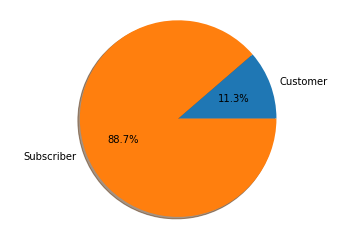

In [5]:
#pie chart for number of trips based on user_type
labels = ['Male', 'Female']
sizes = df_f2.trips.groupby(df_f2.user_type).sum()
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=sizes.index, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

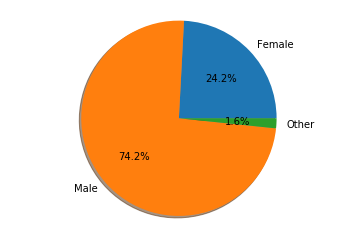

In [6]:
#pie chart for number of trips based on member_gender
labels = ['Male', 'Female']
sizes = df_f2.trips.groupby(df_f2.member_gender).sum()
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=sizes.index, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

In [7]:
#descriptive stats
print(df_f2.describe())

        member_age         trips  duration_sec  total_bikes
count  2667.000000   2667.000000   2667.000000  2667.000000
mean     52.936633   1198.976753    819.934196   649.229471
std      25.178107   2846.376635    738.583870  1118.048004
min      18.000000      1.000000    106.000000     1.000000
25%      33.500000     16.000000    517.000000    14.000000
50%      49.000000    133.000000    671.000000   121.000000
75%      66.000000    848.000000    950.250000   718.000000
max     141.000000  20004.000000  22782.000000  5282.000000


In [8]:
#customer segmentation based on median age, for different user groups  
df3 = df_f2.groupby(['user_type','member_gender']).agg({'member_age':'median'})
df3

member_age
user_type  member_gender            
Customer   Female               46.5
           Male                 50.5
           Other                43.0
Subscriber Female               51.0
           Male                 57.5
           Other                48.0

Text(0.5, 0, 'Member Age')

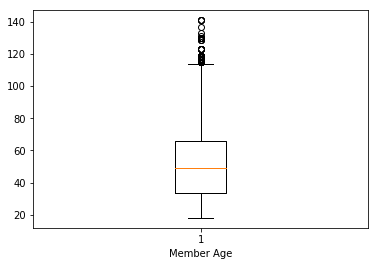

In [9]:
plt.boxplot(df_f2.member_age)
plt.xlabel('Member Age')

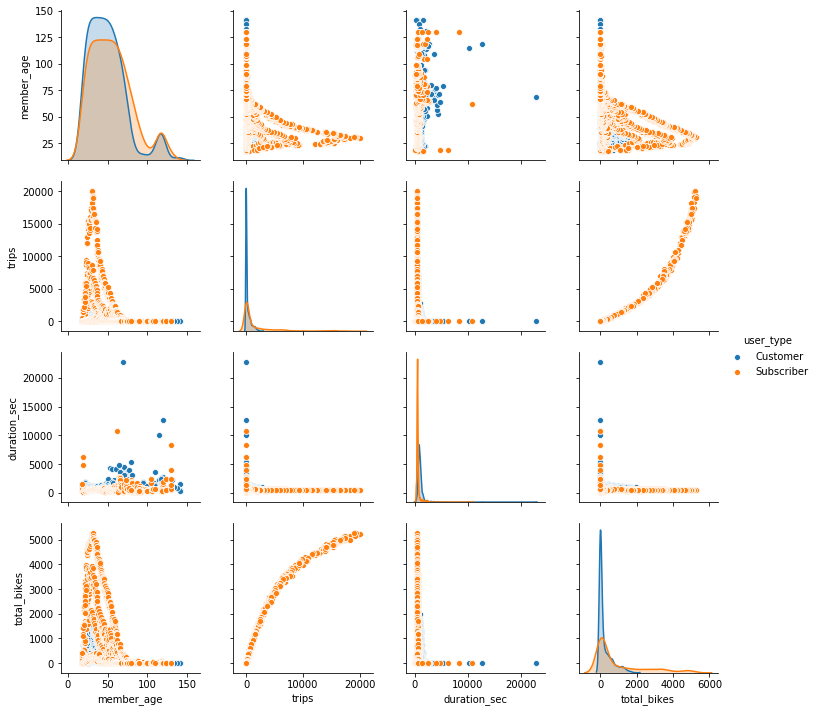

In [10]:
# relationship matirx for member age, trip duration and trips - split by membership type
sns.pairplot(df_f2, hue="user_type")

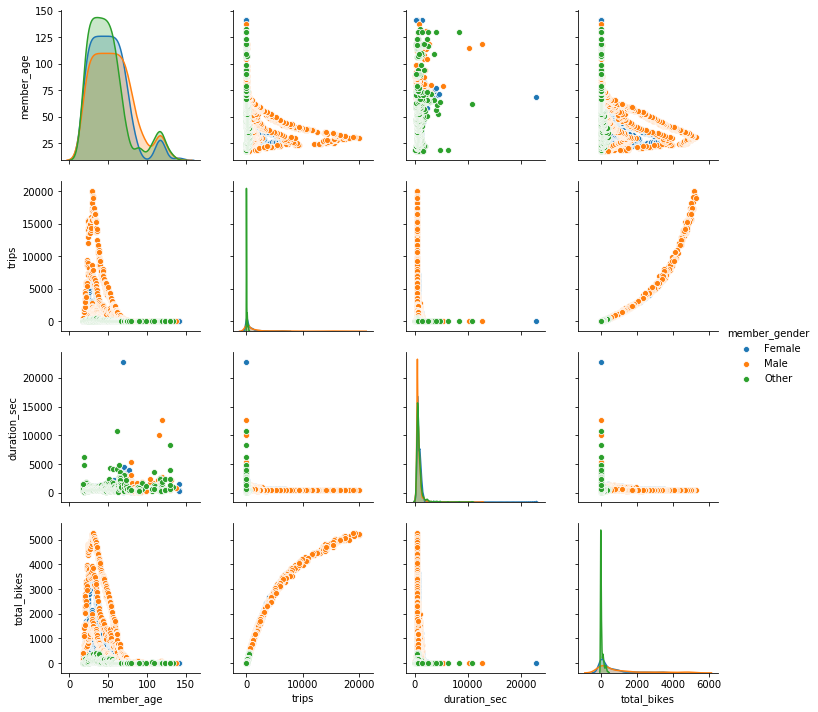

In [11]:
# relationship matirx for member age, trip duration and trips - split by member gender

from pandas.plotting import scatter_matrix
import seaborn as sns
sns.pairplot(df_f2, hue="member_gender")

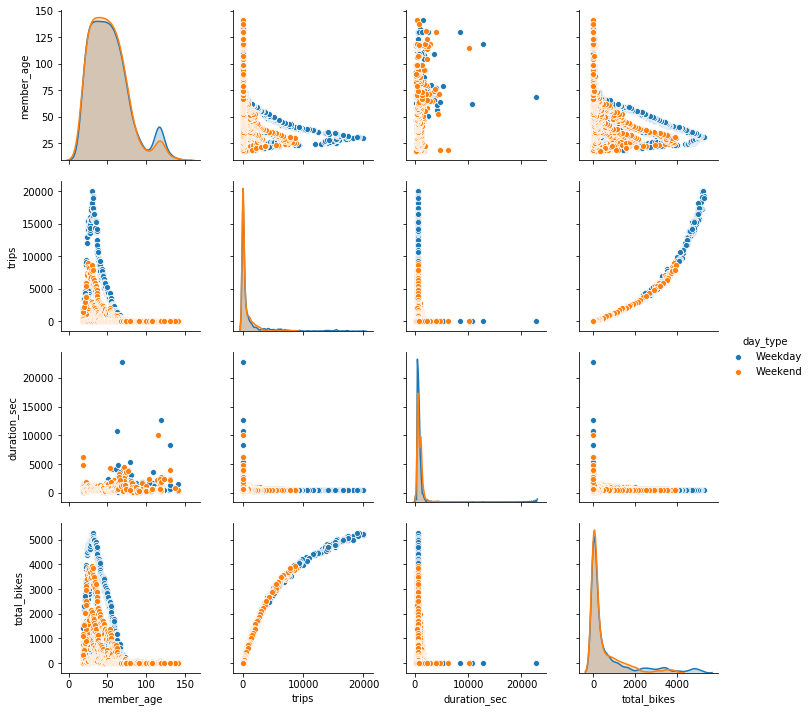

In [12]:
# relationship matirx for member age, trip duration and trips - split by membership type
sns.pairplot(df_f2, hue="day_type")

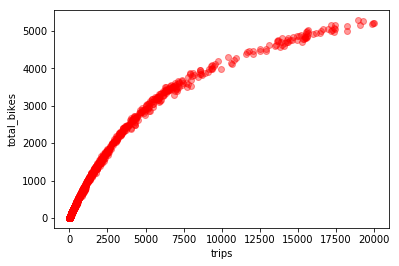

In [13]:
# scatter plot for number of trips vs total bikes

plt.scatter(df_f2.trips, df_f2.total_bikes, c='r', alpha = 0.4)
plt.xlabel('trips')
plt.ylabel('total_bikes')
plt.show()

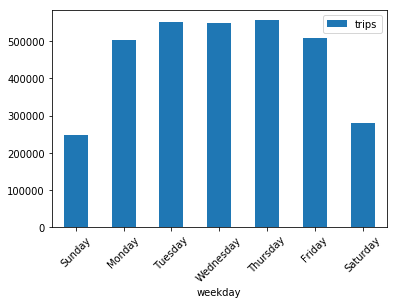

     weekday   trips
3     Sunday  247949
1     Monday  503592
5    Tuesday  550659
6  Wednesday  549473
4   Thursday  556062
0     Friday  509662
2   Saturday  280274


In [14]:
# Average trips per day

df_day = df_f1.groupby(['weekday']).agg({'bike_id' : 'count'}).reset_index()
df_day['weekday'] = pd.Categorical(df_day['weekday'], ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"])
df_day = df_day.sort_values(by = 'weekday')
df_day = df_day.rename({"bike_id": "trips"}, axis = 1)
%matplotlib inline
df_day.plot(kind = 'bar', x = 'weekday').set_xticklabels(df_day.weekday, rotation=45)
plt.show()
print(df_day)

In [15]:
#Correlation matrix

df_corr = df_f2[['trips', 'duration_sec', 'member_age', 'total_bikes']].copy()
a = pd.get_dummies(df_f2.user_type)
df_corr = pd.concat([df_corr,a], axis = 1)

b = pd.get_dummies(df_f2.member_gender)
df_corr = pd.concat([df_corr,b], axis = 1)

d = pd.get_dummies(df_f2.day_type)
df_corr = pd.concat([df_corr,d], axis = 1)

print(df_corr.corr()['trips'].sort_values(ascending = False))
print('\n')
print(df_corr.corr()['duration_sec'].sort_values(ascending = False))
print('\n')
print(df_corr.corr()['total_bikes'].sort_values(ascending = False))

trips           1.000000
total_bikes     0.943842
Male            0.310807
Subscriber      0.290677
Weekday         0.107803
Female         -0.079424
Weekend        -0.107803
duration_sec   -0.147872
Other          -0.251596
Customer       -0.290677
member_age     -0.300474
Name: trips, dtype: float64


duration_sec    1.000000
Customer        0.304873
member_age      0.088802
Weekend         0.080342
Female          0.045223
Other           0.025945
Male           -0.067878
Weekday        -0.080342
trips          -0.147872
total_bikes    -0.179277
Subscriber     -0.304873
Name: duration_sec, dtype: float64


total_bikes     1.000000
trips           0.943842
Male            0.332148
Subscriber      0.325501
Weekday         0.093970
Female         -0.023545
Weekend        -0.093970
duration_sec   -0.179277
Customer       -0.325501
Other          -0.332676
member_age     -0.383188
Name: total_bikes, dtype: float64


In [16]:
#Month-wise trip trend

df_test = final_data_clean.loc[:,['start_time', 'bike_id']]
#print(df_test.shape)
df_test['start_time'] = pd.to_datetime(final_data_clean['start_time']).apply(lambda x: x.strftime('%Y-%m'))
df_month = df_test.groupby(["start_time"]).agg({'bike_id' : 'count'}).reset_index()
df_month = df_month.rename({"bike_id":"trips"}, axis=1)
df_m1 = df_test.groupby(['start_time']).agg({'bike_id' : 'nunique'}).reset_index()
df_m1 = df_m1.rename({"bike_id":"total_bikes"}, axis=1)
df_month = pd.merge(df_month, df_m1, how = 'inner', on = ['start_time'])


print(df_month.shape)
print(df_month.head())

(24, 3)
  start_time  trips  total_bikes
0    2017-06   2387          508
1    2017-07  35910         1970
2    2017-08  69783         2544
3    2017-09  85437         2756
4    2017-10  95316         2643


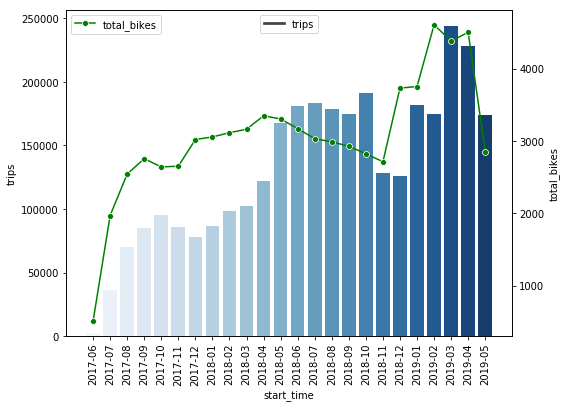

In [47]:
# trend of number of trips and number of bikes for each month

fig, ax1 = plt.subplots(figsize=(8, 6))

sns.barplot(x= df_month.start_time, y= df_month.trips, palette = 'Blues').set_xticklabels(df_month['start_time'], rotation=90)
plt.legend(['trips'], loc= 'upper center')
ax2 = plt.twinx()
sns.lineplot(x= df_month.start_time, y= df_month.total_bikes, ax=ax2, color = 'g', marker = 'o')
plt.legend(['total_bikes'], loc= 'upper left')



In [1]:
# Comparison of trips per bike and total number of bikes 
df_ratio = df_month.copy()
df_ratio['trips_per_bike'] = df_ratio['trips']/ df_ratio['total_bikes']

fig, ax1 = plt.subplots(figsize=(8, 6))
ax1.set_xlabel('Months')
ax1.set_ylabel('Total Bikes')
ax1.plot(df_ratio.start_time,df_ratio.total_bikes, marker = 'o')
plt.xticks(df_ratio.start_time, rotation=90)
leg1 = ax1.legend(loc='upper center')
ax2= plt.twinx()
ax2.plot(df_ratio.start_time,df_ratio.trips_per_bike, 'color='red', marker = 'o'')
ax2.set_ylabel('Trips per bike')
leg2 = ax2.legend(loc='upper left')
ax1.add_artist(leg1)

NameError: name 'df_month' is not defined

Text(0, 0.5, 'Trips per bike')

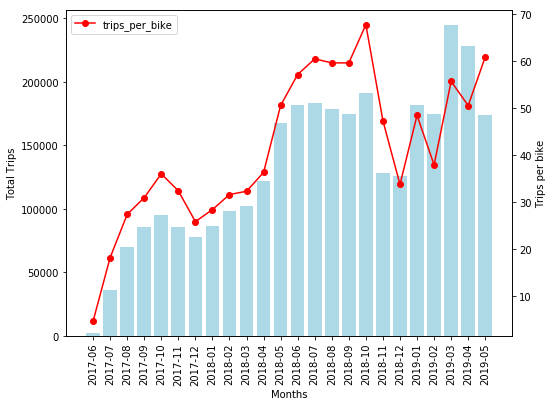

In [19]:

# Change in trips per bike with change in total trips

fig, ax1 = plt.subplots(figsize=(8, 6))
ax1.set_xlabel('Months')
ax1.set_ylabel('Total Trips')
ax1.bar(df_ratio.start_time,df_ratio.trips, color = 'lightblue')
plt.xticks(df_ratio.start_time, rotation=90)
ax2= plt.twinx()
ax2.plot(df_ratio.start_time,df_ratio.trips_per_bike, color = 'red' , marker = 'o')

leg1 = ax2.legend(loc='upper left')
ax2.set_ylabel('Trips per bike')



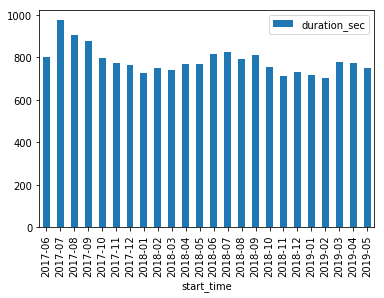

(24, 2)
  start_time  duration_sec
0    2017-06    801.413909
1    2017-07    976.500696
2    2017-08    906.679234
3    2017-09    876.153107
4    2017-10    796.350371


In [20]:
# Month-wise trend of duration of trips

df_duration = final_data_clean.loc[:,['start_time', 'duration_sec']]
#print(df_test.shape)
df_duration['start_time'] = pd.to_datetime(df_duration['start_time']).apply(lambda x: x.strftime('%Y-%m'))
df_duration = df_duration.groupby(["start_time"]).agg({'duration_sec' : 'mean'}).reset_index()
df_duration.plot(kind = 'bar', x= 'start_time')
plt.show()
print(df_duration.shape)
print(df_duration.head())

In [21]:
# Cumulative percent for trips starting from start_station

df_ss = df_f1.groupby(['start_station_name']).agg({'bike_id' : 'count'}).reset_index()
df_ss = df_ss.rename({"bike_id":"trips"}, axis=1)
n = df_ss['trips'].sum()
df_ss['percent'] = df_ss['trips'].apply(lambda x: (x*100/n))
df_ss = df_ss.sort_values(by = 'trips', ascending = False)
df_ss['cum_percent'] = df_ss['percent'].cumsum()
print(df_ss)
print(df_ss.shape)
print(n)

                                    start_station_name  trips   percent  \
321  San Francisco Caltrain Station 2  (Townsend St...  67964  2.125422   
245                               Market St at 10th St  63774  1.994389   
323  San Francisco Ferry Building (Harry Bridges Pl...  60838  1.902572   
320     San Francisco Caltrain (Townsend St at 4th St)  60010  1.876678   
104                                 Berry St at 4th St  58788  1.838463   
269   Montgomery St BART Station (Market St at 2nd St)  55607  1.738984   
295       Powell St BART Station (Market St at 4th St)  51675  1.616020   
365                      The Embarcadero at Sansome St  49828  1.558259   
351                            Steuart St at Market St  48495  1.516573   
207                              Howard St at Beale St  47796  1.494713   
296       Powell St BART Station (Market St at 5th St)  42847  1.339944   
153   Embarcadero BART Station (Beale St at Market St)  37255  1.165067   
58                       

In [22]:
# Cumulative percent for trips ending at end station

df_es = df_f1.groupby(['end_station_name']).agg({'bike_id' : 'count'}).reset_index()
df_es = df_es.rename({"bike_id":"trips"}, axis=1)
m = df_es['trips'].sum()
df_es['percent'] = df_es['trips'].apply(lambda x: (x*100/n))
df_es = df_es.sort_values(by = 'trips', ascending = False)
df_es['cum_percent'] = df_es['percent'].cumsum()
print(df_es)
print(df_es.shape)
print(m)

                                      end_station_name  trips   percent  \
321  San Francisco Caltrain Station 2  (Townsend St...  90397  2.826964   
320     San Francisco Caltrain (Townsend St at 4th St)  72363  2.262991   
323  San Francisco Ferry Building (Harry Bridges Pl...  71880  2.247886   
269   Montgomery St BART Station (Market St at 2nd St)  65852  2.059374   
245                               Market St at 10th St  62884  1.966556   
104                                 Berry St at 4th St  56974  1.781734   
365                      The Embarcadero at Sansome St  56318  1.761219   
295       Powell St BART Station (Market St at 4th St)  54868  1.715874   
351                            Steuart St at Market St  48784  1.525610   
296       Powell St BART Station (Market St at 5th St)  44342  1.386697   
207                              Howard St at Beale St  42192  1.319460   
369                              Townsend St at 7th St  35078  1.096986   
58                       

In [23]:
# filter data for EDA for start_time

df_week_time = final_data_clean[['start_time', 'bike_id', 'duration_sec', 'weekday']].copy()
df_week_time['start_time'] = pd.to_datetime(df_week_time['start_time'])
df_week_time['start_hour'] = df_week_time['start_time'].apply(lambda x: x.strftime('%H'))
df_week_time = df_week_time.groupby(['start_hour', 'weekday']).agg({'bike_id' : 'count', 'duration_sec' : 'mean'}).reset_index()
df_week_time = df_week_time.rename({"bike_id":"trips"}, axis=1)
df_week_time['weekday'] = pd.Categorical(df_week_time['weekday'], ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
df_week_time = df_week_time.sort_values(by = 'weekday')
print(df_week_time)

    start_hour   weekday  trips  duration_sec
85          12    Monday  19305    852.680031
113         16    Monday  37632    734.538000
64          09    Monday  48799    679.954282
29          04    Monday    703    789.146515
99          14    Monday  16804    837.590752
120         17    Monday  67156    705.345018
43          06    Monday  11305    569.871738
127         18    Monday  51728    713.324060
22          03    Monday    372   1509.129032
92          13    Monday  18200    859.194451
134         19    Monday  29838    720.797775
36          05    Monday   2842    600.699859
15          02    Monday    607   1075.660626
141         20    Monday  18226    715.373971
106         15    Monday  20554    802.569184
155         22    Monday   6795    757.046063
78          11    Monday  16834    816.469645
148         21    Monday  11602    678.821238
1           00    Monday   1585    843.032177
162         23    Monday   3322    774.441902
8           01    Monday    799   

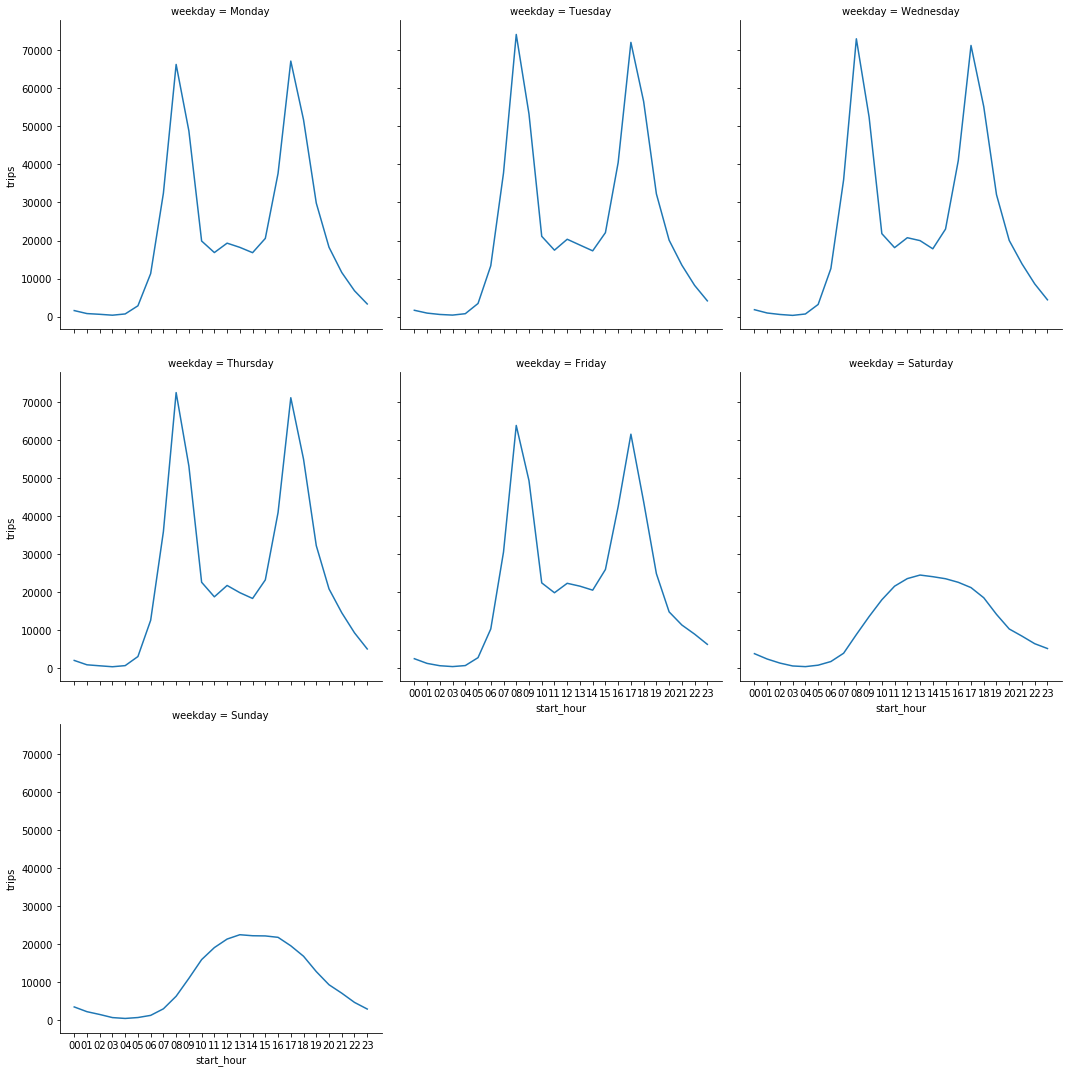

In [24]:
# Day-wise hourly trend of number of trips

sns.relplot(x = 'start_hour', y = 'trips', col = 'weekday', col_wrap = 3, kind = 'line', data = df_week_time)

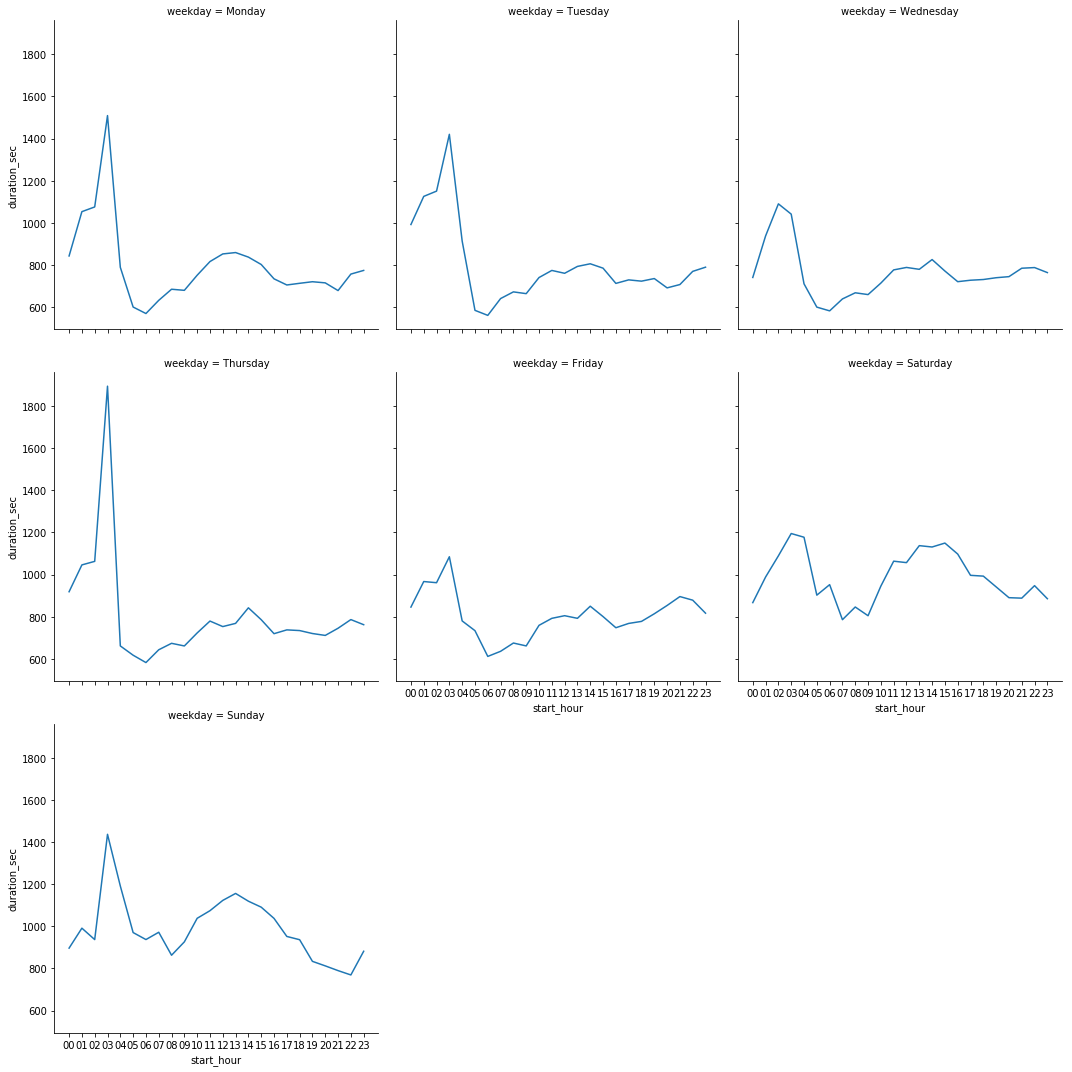

In [25]:
# Day-wise hourly trend for trip duration 

sns.relplot(x = 'start_hour', y = 'duration_sec', col = 'weekday', col_wrap = 3, kind = 'line', data = df_week_time)

In [26]:
# filter data for EDA for end_time

df_week_time2 = final_data_clean[['end_time', 'bike_id', 'duration_sec', 'weekday']].copy()
df_week_time2['end_time'] = pd.to_datetime(df_week_time2['end_time'])
df_week_time2['end_hour'] = df_week_time2['end_time'].apply(lambda x: x.strftime('%H'))
df_week_time2 = df_week_time2.groupby(['end_hour', 'weekday']).agg({'bike_id' : 'count', 'duration_sec' : 'mean'}).reset_index()
df_week_time2 = df_week_time2.rename({"bike_id":"trips"}, axis=1)
df_week_time2['weekday'] = pd.Categorical(df_week_time2['weekday'], ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
df_week_time2 = df_week_time2.sort_values(by = 'weekday')

print(df_week_time2)

    end_hour   weekday  trips  duration_sec
85        12    Monday  18906    805.865545
113       16    Monday  34206    731.932877
64        09    Monday  55320    687.454483
29        04    Monday    620    977.082258
99        14    Monday  16598    851.986504
120       17    Monday  64606    689.189859
43        06    Monday   9701    584.763323
127       18    Monday  55879    698.883284
22        03    Monday    358   1339.913408
92        13    Monday  18730    833.185852
134       19    Monday  32569    718.272283
36        05    Monday   2418    632.814309
15        02    Monday    696   1141.489943
141       20    Monday  19986    712.446012
106       15    Monday  19008    839.625684
155       22    Monday   7642    726.853703
78        11    Monday  16386    781.605334
148       21    Monday  12498    719.855897
1         00    Monday   1767    855.788908
162       23    Monday   3805    839.208673
8         01    Monday    879   1233.889647
57        08    Monday  61859   

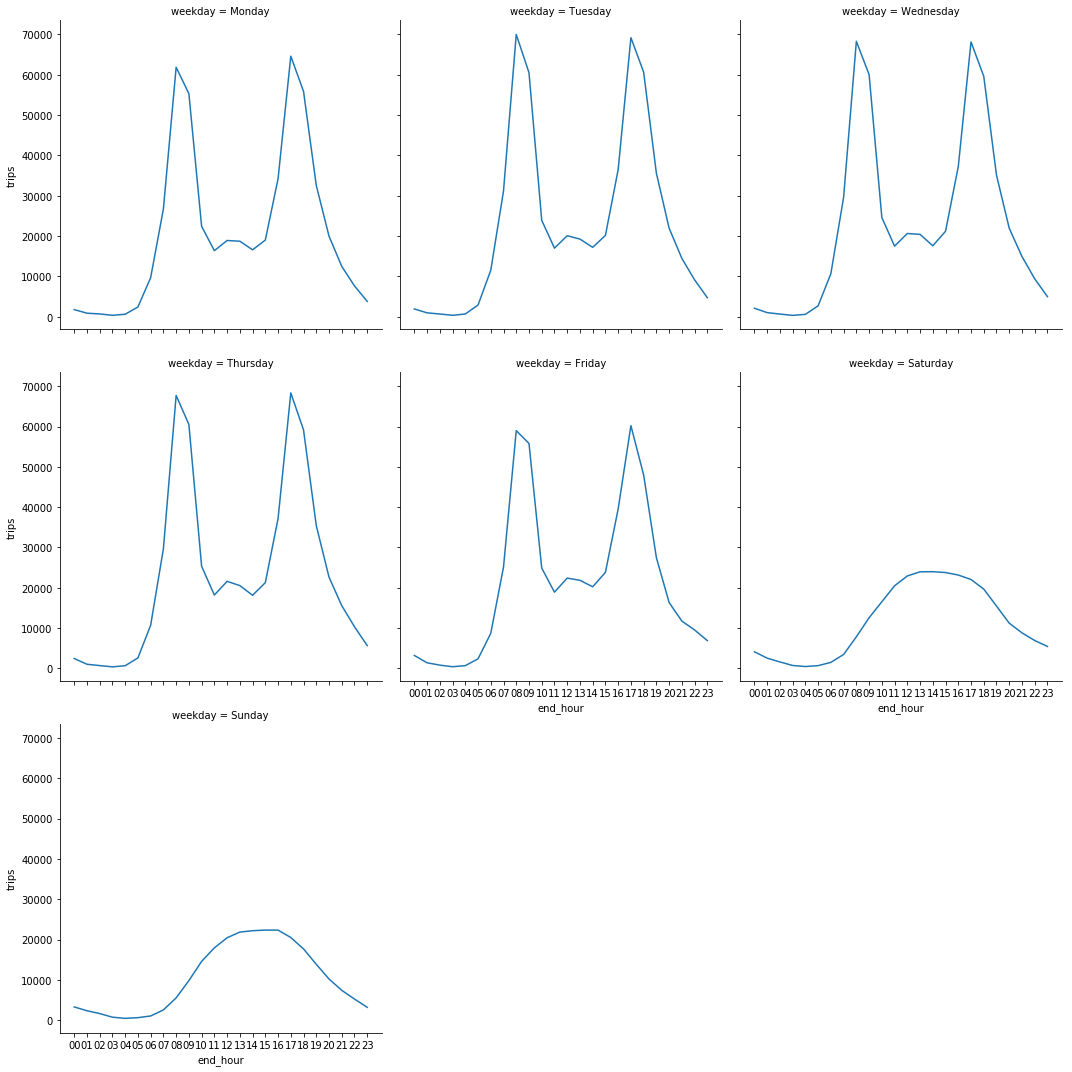

In [27]:
sns.relplot(x = 'end_hour', y = 'trips', col = 'weekday', col_wrap = 3, kind = 'line', data = df_week_time2)

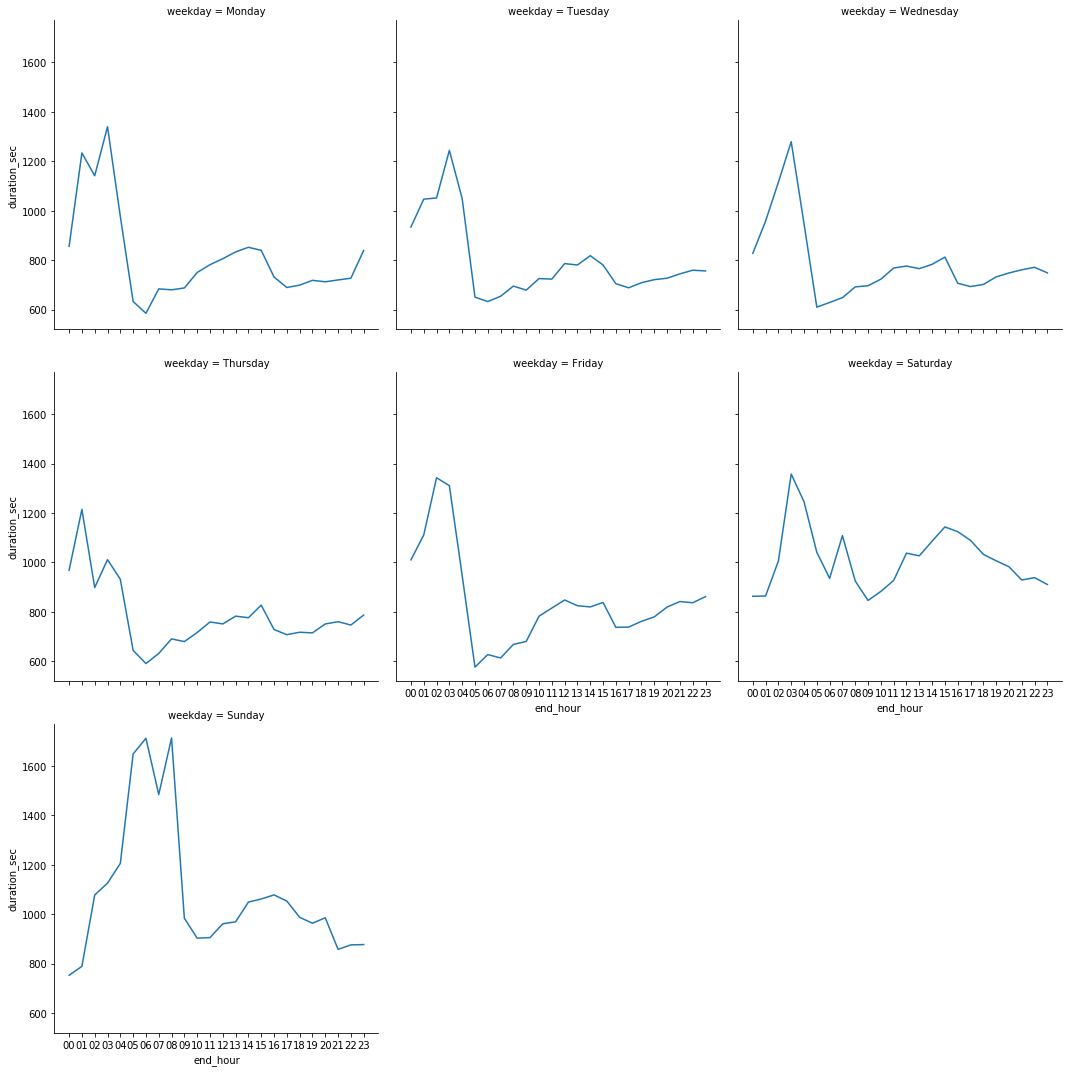

In [28]:
sns.relplot(x = 'end_hour', y = 'duration_sec', col = 'weekday', col_wrap = 3, kind = 'line', data = df_week_time2)

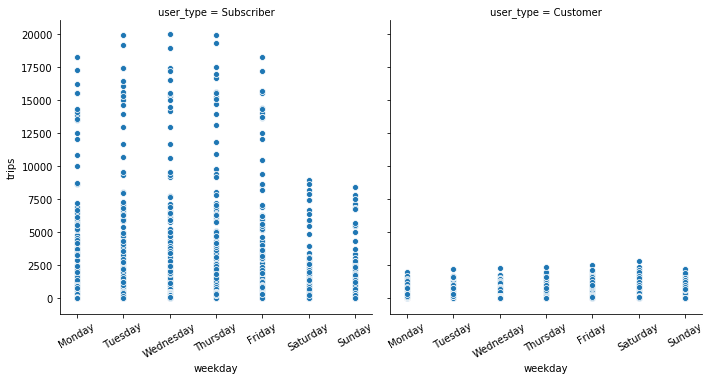

In [29]:
df_f2['weekday'] = pd.Categorical(df_f2['weekday'], ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
df_f2 = df_f2.sort_values(by = 'weekday')
sns.relplot(x= 'weekday', y = 'trips', col ='user_type', data = df_f2).set_xticklabels(rotation=30)

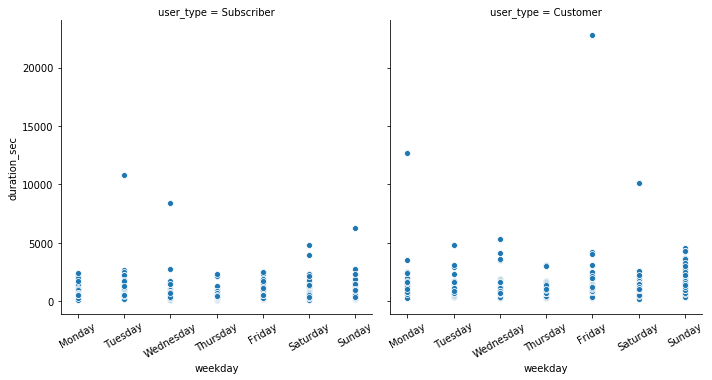

In [30]:
df_f2['weekday'] = pd.Categorical(df_f2['weekday'], ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
df_f2 = df_f2.sort_values(by = 'weekday')
sns.relplot(x= 'weekday', y = 'duration_sec', col ='user_type', data = df_f2).set_xticklabels(rotation=30)

In [31]:
#compare trips taken by subscribers and customer- hour-wise for each day

df_week_time3 = final_data_clean[['start_time', 'bike_id', 'duration_sec', 'weekday','user_type']].copy()
df_week_time3['start_time'] = pd.to_datetime(df_week_time3['start_time'])
df_week_time3['start_hour'] = df_week_time3['start_time'].apply(lambda x: x.strftime('%H'))
df_week_time3 = df_week_time3.groupby(['start_hour', 'weekday', 'user_type']).agg({'bike_id' : 'count', 'duration_sec' : 'mean'}).reset_index()
df_week_time3 = df_week_time3.rename({"bike_id":"trips"}, axis=1)
df_week_time3['weekday'] = pd.Categorical(df_week_time3['weekday'], ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
df_week_time3 = df_week_time3.sort_values(by = 'weekday')

print(df_week_time3)

    start_hour weekday   user_type  trips  duration_sec
128         09  Monday    Customer   3144   1288.744911
31          02  Monday  Subscriber    540   1011.844444
282         20  Monday    Customer   1427   1474.700070
170         12  Monday    Customer   2587   2019.717820
269         19  Monday  Subscriber  27254    655.222353
268         19  Monday    Customer   2584   1412.435759
184         13  Monday    Customer   2578   1919.542669
185         13  Monday  Subscriber  15622    684.211881
44          03  Monday    Customer     24   7772.250000
45          03  Monday  Subscriber    348   1077.189655
87          06  Monday  Subscriber  10667    545.429643
255         18  Monday  Subscriber  47294    657.418298
254         18  Monday    Customer   4434   1309.626973
86          06  Monday    Customer    638    978.529781
198         14  Monday    Customer   2571   1733.062233
199         14  Monday  Subscriber  14233    675.835874
241         17  Monday  Subscriber  61756    651

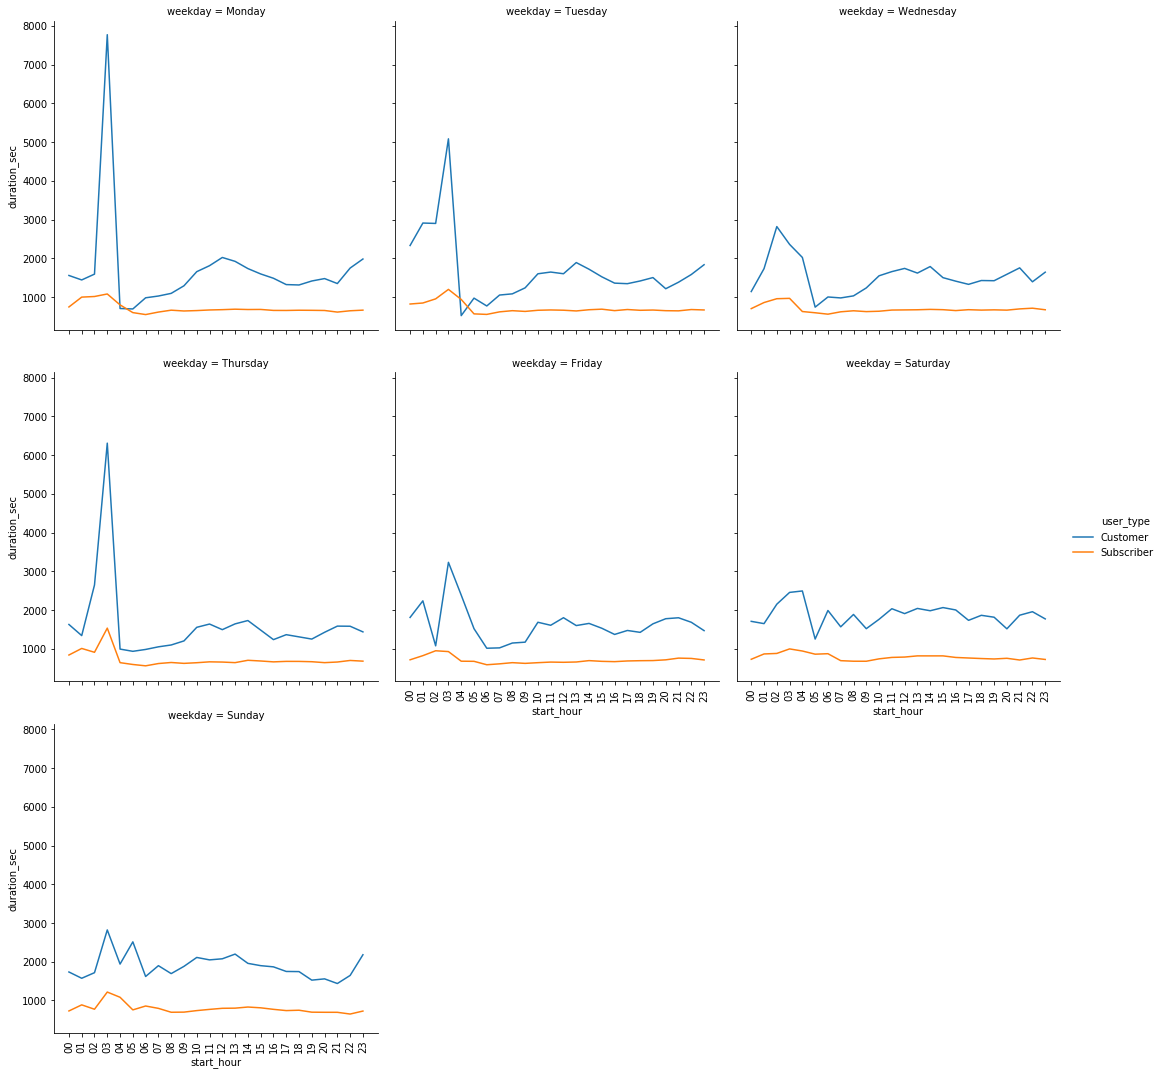

In [32]:
sns.relplot(x = 'start_hour', y = 'duration_sec', col = 'weekday', hue = 'user_type', col_wrap = 3, kind = 'line', data = df_week_time3).set_xticklabels(rotation=90)

In [33]:
# making forecasting dataframe

time_test = final_data_clean[['start_time', 'bike_id']].copy()
time_test = time_test[(time_test['start_time'] > '2017-07-31 23:59:59')]
time_test['year'] = pd.to_datetime(time_test['start_time']).apply(lambda x: x.strftime("%Y"))
time_test['year'] = time_test['year'].astype(int)
time_test['month'] = pd.to_datetime(time_test['start_time']).apply(lambda x: x.strftime("%m"))
time_test['month'] = time_test['month'].astype(int)
time_train = time_test.groupby(['year','month']).agg({'bike_id' : 'count'}).reset_index()
time_train = time_train.rename({"bike_id":"trips"}, axis=1)
time_train = time_train.sort_values(['year', 'month'])

time_train2 = time_test.groupby(['year','month']).agg({'bike_id' : 'nunique'}).reset_index()
time_train2 = time_train2.rename({"bike_id":"total_bikes"}, axis=1)
time_train2 = time_train2.sort_values(['year', 'month'])

time_train = pd.merge(time_train, time_train2, how = 'inner', on = ['year', 'month'])
print(time_train)

    year  month   trips  total_bikes
0   2017      8   69783         2544
1   2017      9   85437         2756
2   2017     10   95316         2643
3   2017     11   86090         2652
4   2017     12   78236         3021
5   2018      1   86963         3057
6   2018      2   98626         3115
7   2018      3  102347         3163
8   2018      4  121791         3349
9   2018      5  167376         3306
10  2018      6  181405         3171
11  2018      7  183694         3034
12  2018      8  178375         2989
13  2018      9  174768         2928
14  2018     10  191485         2824
15  2018     11  128564         2714
16  2018     12  126162         3732
17  2019      1  182122         3754
18  2019      2  174952         4607
19  2019      3  244355         4383
20  2019      4  227848         4503
21  2019      5  173679         2850


In [34]:
time_train.describe()

,year,month,trips,total_bikes
count,22.000000,22.000000,22.000000,22.000000
mean,2018.000000,6.500000,143607.909091,3231.590909
std,0.690066,3.687172,51352.097040,602.552164
min,2017.000000,1.000000,69783.000000,2544.000000
25%,2018.000000,3.250000,96143.500000,2830.500000
50%,2018.000000,6.500000,147970.000000,3045.500000
75%,2018.000000,9.750000,180647.500000,3338.250000
max,2019.000000,12.000000,244355.000000,4607.000000


In [35]:
print(time_train.corr())

                 year     month     trips  total_bikes
year         1.000000 -0.655036  0.790276     0.742229
month       -0.655036  1.000000 -0.299876    -0.527703
trips        0.790276 -0.299876  1.000000     0.611621
total_bikes  0.742229 -0.527703  0.611621     1.000000


In [36]:
# Model fit

x = time_train[['year', 'month', 'trips']]
y = time_train[['total_bikes']]
x,y = np.array(x), np.array(y)
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.5596412767721957
intercept: [-964477.08430311]
slope: [[ 4.79488069e+02 -2.06014584e+01  1.64101022e-03]]


In [37]:
#prediction

y_pred = model.predict(x)
print('Predicted response:', y_pred.astype(int), sep='\n')

Predicted response:
[[2600]
 [2605]
 [2600]
 [2565]
 [2531]
 [3251]
 [3250]
 [3235]
 [3247]
 [3301]
 [3303]
 [3287]
 [3257]
 [3231]
 [3238]
 [3114]
 [3089]
 [3887]
 [3855]
 [3948]
 [3900]
 [3791]]


In [38]:
# predicting by taking log of target variable
time_train2 = time_train.copy()
time_train2['total_bikes'] = np.log(time_train2['total_bikes'])
#print(time_train2.head())

x1 = time_train2[['year', 'month', 'trips']]
y1 = time_train2[['total_bikes']]
x1,y1 = np.array(x1), np.array(y1)
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x1, y1)
r_sq = model.score(x1, y1)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.5757202737156146
intercept: [-269.79859731]
slope: [[ 1.37682067e-01 -6.70308931e-03  4.56443487e-07]]


In [39]:
y_pred1 = model.predict(x1)
print('Predicted response:', y_pred1.astype(int), sep='\n')

Predicted response:
[[7]
 [7]
 [7]
 [7]
 [7]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]
 [8]]


In [40]:
y_o = np.exp(y_pred1)
print(y_o.astype(int))

[[2655]
 [2656]
 [2650]
 [2622]
 [2595]
 [3218]
 [3214]
 [3198]
 [3205]
 [3250]
 [3249]
 [3231]
 [3202]
 [3175]
 [3178]
 [3067]
 [3044]
 [3858]
 [3819]
 [3916]
 [3861]
 [3741]]


      Month  total_bikes
0   2019-06         3249
1   2019-07         3231
2   2019-08         3202
3   2019-09         3175
4   2019-10         3178
5   2019-11         3067
6   2019-12         3044
7   2020-01         3858
8   2020-02         3819
9   2020-03         3916
10  2020-04         3861
11  2020-05         3741


[Text(0, 0, '2019-06'),
 Text(0, 0, '2019-07'),
 Text(0, 0, '2019-08'),
 Text(0, 0, '2019-09'),
 Text(0, 0, '2019-10'),
 Text(0, 0, '2019-11'),
 Text(0, 0, '2019-12'),
 Text(0, 0, '2020-01'),
 Text(0, 0, '2020-02'),
 Text(0, 0, '2020-03'),
 Text(0, 0, '2020-04'),
 Text(0, 0, '2020-05')]

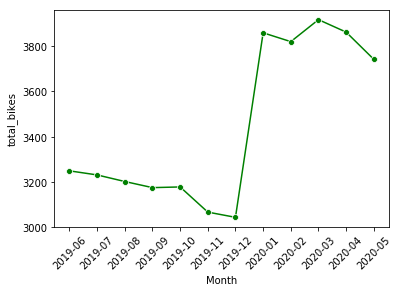

In [41]:
#making predicting dataframe
df_predict = pd.DataFrame()
px = ['2019-06','2019-07','2019-08','2019-09','2019-10','2019-11','2019-12','2020-01','2020-02','2020-03','2020-04','2020-05']
py = pd.DataFrame(y_o[10:])
df_predict['Month'] = px
df_predict = pd.concat([df_predict,py], axis = 1)
df_predict = df_predict.rename(index=str, columns={0:'total_bikes'})
df_predict['total_bikes'] = df_predict['total_bikes'].astype(int)
print(df_predict)

sns.lineplot(x= df_predict.Month, y= df_predict.total_bikes, color = 'g', marker = 'o').set_xticklabels(df_predict.Month, rotation = 45)

In [42]:
print(df_predict['total_bikes'].min())
print(df_predict['total_bikes'].max())

3044
3916


In [43]:
#daily bike rates for each station - difference between total bikes ended trip at that station and total bikes started trips at that station

cln_data = final_data_clean[['start_time','end_time','start_station_name','end_station_name','weekday','bike_id']].copy()
cln_data['start_date'] = pd.to_datetime(cln_data['start_time']).apply(lambda x: x.date())
cln_data['end_date'] = pd.to_datetime(cln_data['end_time']).apply(lambda x: x.date())
cln_data['weekday_end'] = pd.to_datetime(cln_data['end_time']).apply(lambda x: x.day_name())
strt = cln_data.groupby(['start_station_name','start_date','weekday']).count()[['bike_id']].reset_index()
end = cln_data.groupby(['end_station_name','end_date','weekday_end']).count()[['bike_id']].reset_index()
bike_rate = strt.merge(end,how='left',left_on=['start_station_name','start_date'],right_on=['end_station_name','end_date'],suffixes=['-S','-E'])
bike_rate['bike_id-S'].fillna(0,inplace=True)
bike_rate['bike_id-E'].fillna(0,inplace=True)
bike_rate['rate']=bike_rate['bike_id-E']-bike_rate['bike_id-S']
bike_rate['Weekday'] = bike_rate['weekday']
bike_rate = bike_rate.rename(columns={'start_station_name':'Station', 'start_date':'Date'})
end_only = end.merge(strt,how='left',left_on=['end_station_name','end_date'],right_on=['start_station_name','start_date'],suffixes=['-E','-S'])
end_only = end_only[end_only.start_station_name.isnull()]
end_only = end_only.rename(columns={'end_station_name':'Station','end_date':'Date'})
end_only['rate'] = end_only['bike_id-E']
end_only['Weekday'] = end_only['weekday_end']
bike_rate = bike_rate.append(end_only,sort=False)
br = bike_rate.groupby(['Station','Weekday']).mean()['rate'].reset_index()
br=br.sort_values(['Weekday','rate'])
br1 = br.groupby(['Weekday']).head(20)
br2 = br.groupby(['Weekday']).tail(20)
br2 = br2.sort_values(['Weekday','rate'],ascending=[True,False])
print(br2.head())

                                                Station Weekday       rate
2223  San Francisco Caltrain Station 2  (Townsend St...  Friday  39.574257
1868   Montgomery St BART Station (Market St at 2nd St)  Friday  18.277228
2237  San Francisco Ferry Building (Harry Bridges Pl...  Friday  17.415842
2216     San Francisco Caltrain (Townsend St at 4th St)  Friday  11.584158
558                                8th St at Brannan St  Friday   9.454545


In [44]:
#hourly bike rates for each station - difference between total bikes ended trip at that station and total bikes started trips at that station

cln_data1 = final_data_clean[['start_time','end_time','start_station_name','end_station_name','bike_id']].copy()
cln_data1['start_hour'] = pd.to_datetime(cln_data1['start_time']).apply(lambda x: x.hour)
cln_data1['end_hour'] = pd.to_datetime(cln_data1['end_time']).apply(lambda x: x.hour)
cln_data1['start_date'] = pd.to_datetime(cln_data1['start_time']).apply(lambda x: x.date())
cln_data1['end_date'] = pd.to_datetime(cln_data1['end_time']).apply(lambda x: x.date())
strt1 = cln_data1.groupby(['start_station_name','start_hour','start_date']).count()[['bike_id']].reset_index()
end1 = cln_data1.groupby(['end_station_name','end_hour','end_date']).count()[['bike_id']].reset_index()
bike_rate1 = strt1.merge(end1,how='left',left_on=['start_station_name','start_hour','start_date'],right_on=['end_station_name','end_hour','end_date'],suffixes=['-S','-E'])
bike_rate1['bike_id-S'].fillna(0,inplace=True)
bike_rate1['bike_id-E'].fillna(0,inplace=True)
bike_rate1['rate']=bike_rate1['bike_id-E']-bike_rate1['bike_id-S']
bike_rate1 = bike_rate1.rename(columns={'start_station_name':'Station', 'start_hour':'Hour'})
end_only1 = end1.merge(strt1,how='left',left_on=['end_station_name','end_hour','end_date'],right_on=['start_station_name','start_hour','start_date'],suffixes=['-E','-S'])
end_only1 = end_only1[end_only1.start_station_name.isnull()]
end_only1 = end_only1.rename(columns={'end_station_name':'Station','end_hour':'Hour'})
end_only1['rate'] = end_only1['bike_id-E']
bike_rate1 = bike_rate1.append(end_only1,sort=False)
rt = bike_rate1.groupby(['Station','Hour']).mean()['rate'].reset_index()
rt['rate'] = rt['rate'].apply(lambda x: round(x, 2))
rt=rt.sort_values(['Hour','rate'])
rt1 = rt.groupby(['Hour']).head(20)
rt2 = rt.groupby(['Hour']).tail(20)
rt2 = rt2.sort_values(['Hour','rate'],ascending=[True,False])
print(rt2.head())

                                                Station  Hour  rate
4426                         Greenwich St at Webster St     0  2.00
6531                        Parker Ave at McAllister St     0  1.40
2403                                    Bestor Art Park     0  1.39
8953  Webster St at MacArthur Blvd (Temporary Location)     0  1.33
6193                          Morrison Ave at Julian St     0  1.11


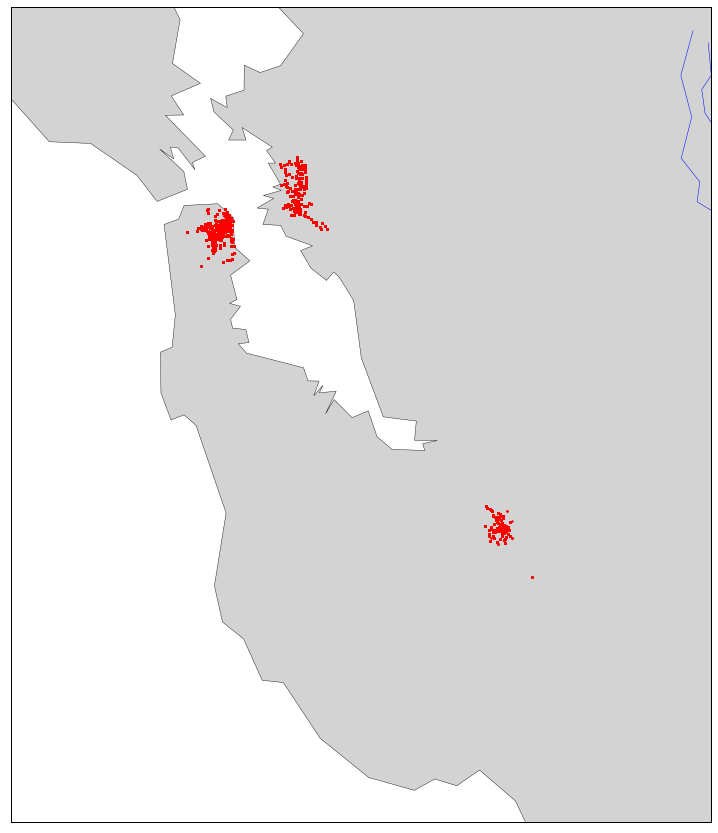

In [3]:
#Native version of Jupyter on Anaconda does not contain latest basemap packages and will throw the following error - "no module named 'mpl_toolkits.basemap.
#To run the following block of code, please download latest packages for conda forge basemap using Anaconda Prompt. 
#After the packages are successfully downloaded, the following exception is thrown - KeyError: 'PROJ_LIB'.
#For the conda version of basemap it needs the PROJ_LIB variable to be set, so it can find the epsg data.
#Set the environment path to handle this error. 

# plotting mercater projection for top 20 stations

%matplotlib inline
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

import os
os.environ['PROJ_LIB'] = r'C:\Users\iamak\Anaconda3\pkgs\proj4-5.2.0-h6538335_1004\Library\share'
from mpl_toolkits.basemap import Basemap

import matplotlib 
matplotlib.rcParams['figure.figsize'] = (15,15) 

m = Basemap(projection='merc',llcrnrlat=36.9,urcrnrlat=38.1,
            llcrnrlon=-122.8, urcrnrlon=-121.5, resolution='i', area_thresh=50, lat_0=37.769, lon_0=-122.353)

m.drawmapboundary()
m.drawcoastlines(color='black', linewidth=0.4)
m.drawrivers(color='blue')
m.fillcontinents(color='lightgray')

lat = final_data_clean.loc[:,'start_station_latitude'].values
lon = final_data_clean.loc[:,'start_station_longitude'].values
x,y = m(lon, lat)

m.plot(x, y, 'ro', markersize=1)

plt.show()

In [4]:
df1_f1 = final_data_clean.loc[:,['start_station_name','start_station_latitude','start_station_longitude','bike_id']].copy()
df2_f3 = df1_f1.groupby(['start_station_name','start_station_latitude','start_station_longitude']).agg({'bike_id':'count'}).reset_index()
df2_f3.head()
df2_f3 = df2_f3.sort_values(by='bike_id', ascending= False )
df2_f3.head()
df2_f3 = df2_f3.reset_index()
df2_f3.head()



,index,start_station_name,start_station_latitude,start_station_longitude,bike_id
0,333,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,67964
1,254,Market St at 10th St,37.776619,-122.417385,63774
2,335,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,60838
3,332,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,60010
4,110,Berry St at 4th St,37.775880,-122.393170,58788


In [5]:
stations = df2_f3.loc[:19,['start_station_name','start_station_latitude','start_station_longitude','bike_id']]
stations.head(25)

,start_station_name,start_station_latitude,start_station_longitude,bike_id
0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,67964
1,Market St at 10th St,37.776619,-122.417385,63774
2,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,60838
3,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,60010
4,Berry St at 4th St,37.775880,-122.393170,58788
5,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,55607
6,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,51675
7,The Embarcadero at Sansome St,37.804770,-122.403234,49828
8,Steuart St at Market St,37.794130,-122.394430,48495
9,Howard St at Beale St,37.789756,-122.394643,47796


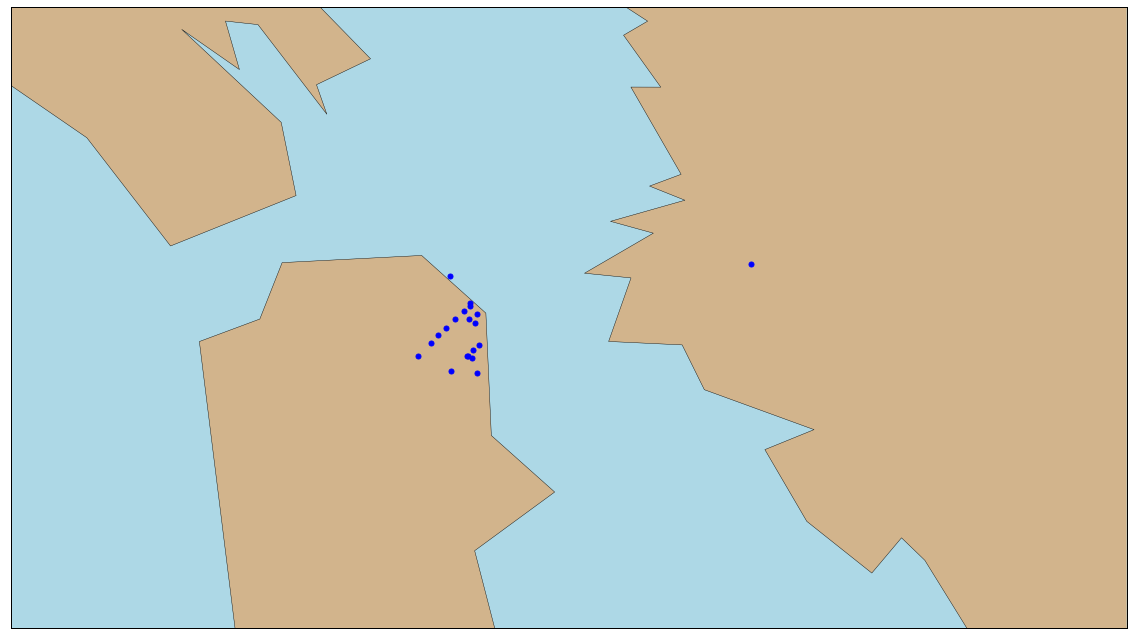

In [6]:
# plotting mercater projection for top 20 start stations

%matplotlib inline

warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

os.environ['PROJ_LIB'] = r'C:\Users\iamak\Anaconda3\pkgs\proj4-5.2.0-h6538335_1004\Library\share'
from mpl_toolkits.basemap import Basemap

import matplotlib 
matplotlib.rcParams['figure.figsize'] = (20,20) 

m = Basemap(projection='merc',llcrnrlat=37.68,urcrnrlat=37.9,
            llcrnrlon=-122.6, urcrnrlon=-122.1, resolution='i', area_thresh=50, lat_0=37.769, lon_0=-122.353)

m.drawstates(linewidth=0.5, linestyle='solid', color='k')
m.drawmapboundary(fill_color='lightblue')
m.drawcoastlines(color='black', linewidth=0.4)
m.drawrivers(color='blue')
m.fillcontinents(color='tan')


lat = stations.loc[:,'start_station_latitude'].values
lon = stations.loc[:,'start_station_longitude'].values
x,y = m(lon, lat)

m.plot(x, y, 'bo', markersize=5)

plt.show()


In [7]:

df1_f2 = final_data_clean.loc[:,['end_station_name','end_station_latitude','end_station_longitude','bike_id']].copy()
df2_f4 = df1_f2.groupby(['end_station_name','end_station_latitude','end_station_longitude']).agg({'bike_id':'count'}).reset_index()
df2_f4.head()
df2_f4 = df2_f4.sort_values(by='bike_id', ascending= False )
df2_f4 = df2_f4.reset_index()
df2_f4.head()
stations = df2_f4.loc[:19,['end_station_name','end_station_latitude','end_station_longitude','bike_id']]
stations.head(20)

,end_station_name,end_station_latitude,end_station_longitude,bike_id
0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,90397
1,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,72363
2,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,71880
3,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,65852
4,Market St at 10th St,37.776619,-122.417385,62884
5,Berry St at 4th St,37.775880,-122.393170,56974
6,The Embarcadero at Sansome St,37.804770,-122.403234,56318
7,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,54868
8,Steuart St at Market St,37.794130,-122.394430,48784
9,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,44342


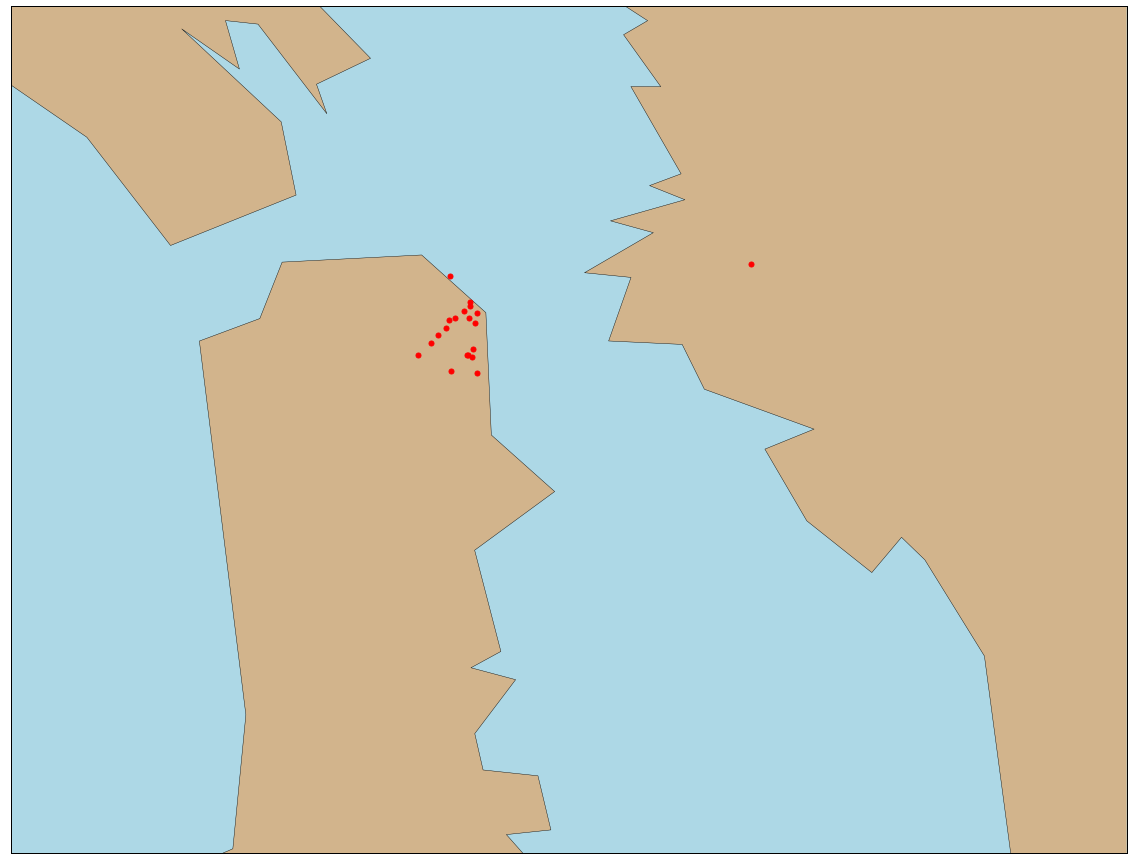

In [8]:
# plotting mercater projection for top 20 end stations

%matplotlib inline
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

import os
os.environ['PROJ_LIB'] = r'C:\Users\iamak\Anaconda3\pkgs\proj4-5.2.0-h6538335_1004\Library\share'
from mpl_toolkits.basemap import Basemap

import matplotlib 
matplotlib.rcParams['figure.figsize'] = (20,20) 

m = Basemap(projection='merc',llcrnrlat=37.6,urcrnrlat=37.9,
            llcrnrlon=-122.6, urcrnrlon=-122.1, resolution='i', area_thresh=50, lat_0=37.769, lon_0=-122.353)

m.drawstates(linewidth=0.5, linestyle='solid', color='k')
m.drawmapboundary(fill_color='lightblue')
m.drawcoastlines(color='black', linewidth=0.4)
m.drawrivers(color='blue')
m.fillcontinents(color='tan')


lat = stations.loc[:,'end_station_latitude'].values
lon = stations.loc[:,'end_station_longitude'].values
x,y = m(lon, lat)

m.plot(x, y, 'ro', markersize=5)

plt.show()
